In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [5]:
# coding up the Eqns from https://ui.adsabs.harvard.edu/abs/2009AJ....138...19K/abstract

In [6]:
lam = (6165 * u.angstrom).to('micron').value

In [7]:
# eqn 3
n_1 = 64.328 + (29498.1/(146-(1/lam**2))) + (255.4/(41-(1/lam**2)))

# am I reading Eqn 3 correctly?
n = n_1/1e6 + 1

print(n)

1.0002767340414684


Text(0, 0.5, 'R (arcsec), $r$-band')

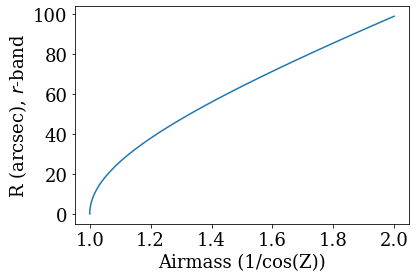

In [8]:
# eqn 2
R0 = (n**2 - 1)/(2*n**2)

Z = np.deg2rad(np.linspace(0,60,100)) # 0-60 deg zenith distance
X = 1./np.cos(Z) # typical airmass approximation

# eqn 1
R = R0*np.tan(Z)

plt.plot(X, np.rad2deg(R)*3600)
plt.xlabel('Airmass (1/cos(Z))')
plt.ylabel('R (arcsec), $r$-band')

Text(0.5, 1.0, '$i$-band, 3000-10000K (7480A - 7560A)')

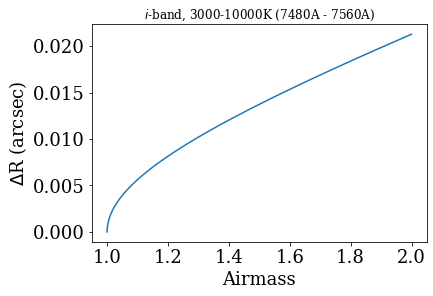

In [9]:
# now look at how diff changes in temp (i.e. effective wavelength center) changes the DCR signal
lam = (np.array([7480,7560]) * u.AA).to('micron')
n_1 = 64.328 + (29498.1/(146-(1/lam.value**2))) + (255.4/(41-(1/lam.value**2)))

n = n_1/1e6 + 1
R0 = (n**2 - 1)/(2*n**2)
dR = (R0[0]*np.tan(Z)) - (R0[1]*np.tan(Z))

plt.plot(X, np.rad2deg(dR)*3600)
plt.xlabel('Airmass')
plt.ylabel('$\Delta$R (arcsec)')
plt.title('$i$-band, 3000-10000K (7480A - 7560A)', fontsize=12)

Text(0.5, 1.0, '$g$-band, 10000-3000K (4710-4950A)')

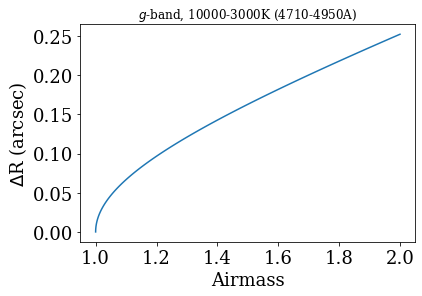

In [10]:
# now look at how diff changes in temp (i.e. effective wavelength center) changes the DCR signal
lam = (np.array([4710,4950]) * u.AA).to('micron')
n_1 = 64.328 + (29498.1/(146-(1/lam.value**2))) + (255.4/(41-(1/lam.value**2)))

n = n_1/1e6 + 1
R0 = (n**2 - 1)/(2*n**2)
dR = (R0[0]*np.tan(Z)) - (R0[1]*np.tan(Z))

plt.plot(X, np.rad2deg(dR)*3600)
plt.xlabel('Airmass')
plt.ylabel('$\Delta$R (arcsec)')
plt.title('$g$-band, 10000-3000K (4710-4950A)', fontsize=12)

In [60]:
from tools import flare_model_v2

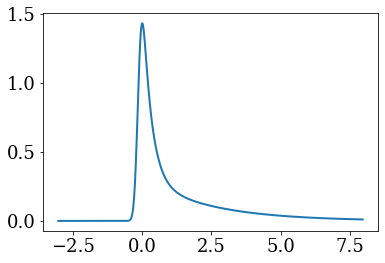

In [61]:
time = np.arange(-1,10,0.01)

fmodel=flare_model_v2(time,2,0.5,1.5)
ypt = max(fmodel)
xpt = time[np.argmax(fmodel)]


plt.plot(time - (xpt), fmodel, lw=2)#, c='r')
plt.savefig('flare_Nov2021.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')

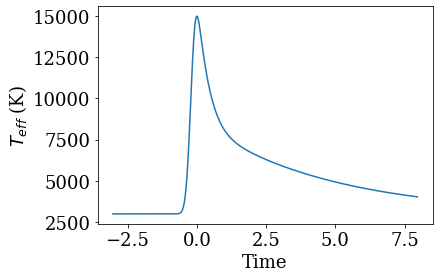

In [62]:
plt.plot(time - (xpt), np.sqrt(fmodel)*10000 + 3000)
plt.ylabel('$T_{eff}$ (K)')
plt.xlabel('Time')
plt.savefig('teff_Nov2021.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')

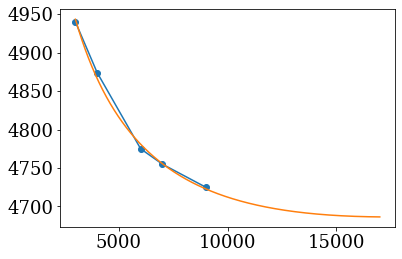

In [63]:
# Weff curve from Riley - approximate it...
temps = np.array([3000, 4000, 6000, 7000, 9000])
weff = np.array([4940, 4874, 4775, 4755, 4725])
plt.plot((temps), weff, '-o')
ff = np.polyfit(np.log10(temps), (weff), 2)
plt.plot(np.arange(3000,17000), np.polyval(ff, np.log10(np.arange(3000,17000))))

Text(0.5, 0, 'Time')

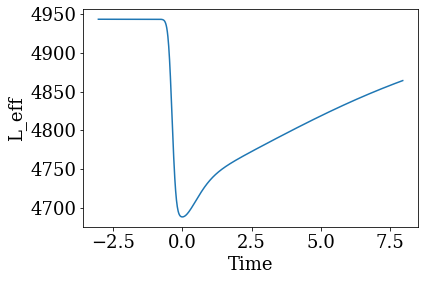

In [64]:
Wmodel = np.interp(np.sqrt(fmodel)*10000+3000, np.arange(3000,17000), np.polyval(ff, np.log10(np.arange(3000,17000))))
plt.plot(time - (xpt), Wmodel)
plt.ylabel('L_eff')
plt.xlabel('Time')

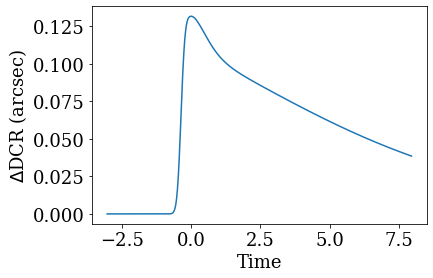

In [66]:
# plt.plot(X,Z)

Z=0.7 # zenith distance (radians)

lam = (Wmodel * u.AA).to('micron')
n_1 = 64.328 + (29498.1/(146-(1/lam.value**2))) + (255.4/(41-(1/lam.value**2)))

n = n_1/1e6 + 1
R0 = (n**2 - 1)/(2*n**2)
dR = (R0*np.tan(Z)) - (R0[0]*np.tan(Z))

plt.plot(time-xpt, np.rad2deg(dR)*3600)

plt.ylabel('$\Delta$DCR (arcsec)')
plt.xlabel('Time')
plt.savefig('deltaDCR_Nov2021.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')